In [6]:
import numpy as np
import matplotlib.pyplot as plt
from rich.table import Table
from rich import print as rptint
import json
import os
import pandas as pd

scenario_name = "CWE-89-SQL-injection"
TIME_PERIOD = 1
TIME_INTERVAL = '1MS'
save_file_path = os.path.join('K:/hids/LID-DS-master/tools/out', scenario_name)

获取数据

In [7]:
test_normal_df = pd.read_pickle(os.path.join(save_file_path,  'DF_test_normal.pkl'))
test_exploit_df = pd.read_pickle(os.path.join(save_file_path, 'DF_test_exploit.pkl'))

test_normal_df.time = pd.to_datetime(test_normal_df['time'])
test_exploit_df.time = pd.to_datetime(test_exploit_df['time'])

In [8]:
test_normal_df

,time,UserID,PID,ProcessName,TID,syscall,DIR,ARGS
0,2021-09-08 06:44:50.806378308,101,3861861,mysqld,3862354,select,<,res=0
1,2021-09-08 06:44:50.806386943,101,3861861,mysqld,3862354,select,>,NaN
2,2021-09-08 06:44:50.806627721,101,3861861,mysqld,3862355,select,<,res=0
3,2021-09-08 06:44:50.806631058,101,3861861,mysqld,3862355,select,>,NaN
4,2021-09-08 06:44:50.812467214,101,3861861,mysqld,3862357,select,<,res=0
...,...,...,...,...,...,...,...,...
3857219,2021-09-07 22:35:37.639777849,101,3255774,mysqld,3255881,io_getevents,>,NaN
3857220,2021-09-07 22:35:37.653835148,0,3256458,apache2,3256458,select,<,res=0
3857221,2021-09-07 22:35:37.653847621,0,3256458,apache2,3256458,wait4,>,NaN
3857222,2021-09-07 22:35:37.653858358,0,3256458,apache2,3256458,wait4,<,NaN


### 1. 程序名分析

查看程序名字是不是就是两个

In [19]:
len(test_normal_df['ProcessName'].value_counts())

2

In [12]:
test_exploit_df['ProcessName'].value_counts()

apache2    1721144
mysqld     1010045
Name: ProcessName, dtype: int64

由上知，就两个程序。

### 2. 调用方向分析

In [10]:
test_normal_df['DIR'].value_counts()

>    1928761
<    1928463
Name: DIR, dtype: int64

In [13]:
test_exploit_df['DIR'].value_counts()

>    1365652
<    1365537
Name: DIR, dtype: int64

由上知，方向不对称，数目不一样。继续分析，每分钟，两个的数量区别。 目前看差别不大

In [17]:
df = pd.read_pickle(os.path.join(save_file_path, 'DataFrame', 'abundant_taussig_9121.pkl'))
df_normal = df[df['time'] < 1631083504800282000]
df_exploit = df[df['time'] >= 1631083504800282000]
df_normal.time = pd.to_datetime(df_normal['time'])
df_exploit.time = pd.to_datetime(df_exploit['time'])

df_normal.resample('S',on='time')['DIR'].agg('count')


C:\Users\SkyGP\.conda\envs\ids\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


time
2021-09-08 06:44:50      12
2021-09-08 06:44:51    2222
2021-09-08 06:44:52    4756
2021-09-08 06:44:53    5050
2021-09-08 06:44:54    3834
2021-09-08 06:44:55    2554
2021-09-08 06:44:56    4140
2021-09-08 06:44:57    3174
2021-09-08 06:44:58    3993
2021-09-08 06:44:59    1344
2021-09-08 06:45:00    1510
2021-09-08 06:45:01    1447
2021-09-08 06:45:02    1430
2021-09-08 06:45:03    1320
2021-09-08 06:45:04    2443
Freq: S, Name: DIR, dtype: int64

In [21]:
df_exploit.resample('S',on='time')['DIR'].value_counts()

time                 DIR
2021-09-08 06:13:50  >       2438
                     <       2436
2021-09-08 06:13:51  >       7908
                     <       7907
2021-09-08 06:13:52  >      25105
                     <      25104
2021-09-08 06:13:53  >        985
                     <        984
2021-09-08 06:13:54  >       1633
                     <       1632
2021-09-08 06:13:55  >       1713
                     <       1712
2021-09-08 06:13:56  >        898
                     <        897
2021-09-08 06:13:57  >       1597
                     <       1596
2021-09-08 06:13:58  >        763
                     <        762
2021-09-08 06:13:59  >       1331
                     <       1330
2021-09-08 06:14:00  >       1008
                     <       1007
2021-09-08 06:14:01  >       1715
                     <       1714
2021-09-08 06:14:02  >       6540
                     <       6539
2021-09-08 06:14:03  <       7793
                     >       7793
2021-09-08 06:14:04  < 

### 程序整合

#### 程序名

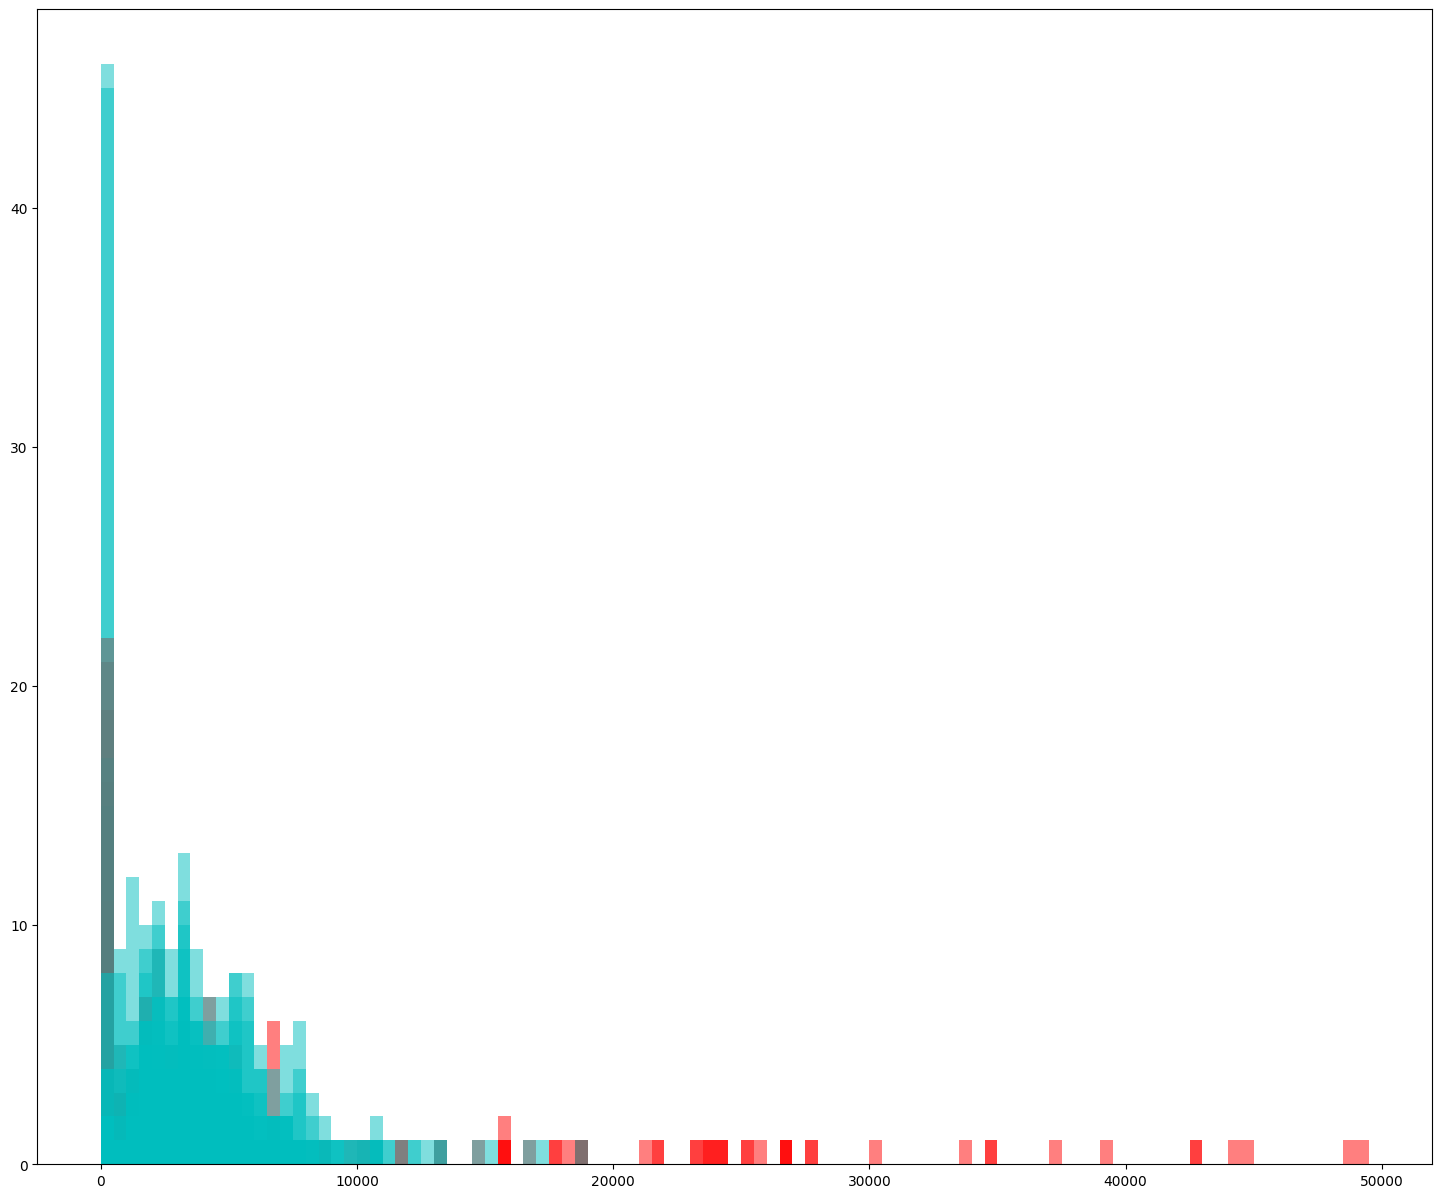

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from rich.table import Table
from rich import print as rptint
import json
import os
import pandas as pd

scenario_name = "CWE-89-SQL-injection"
save_file_path = os.path.join('K:/hids/LID-DS-master/tools/out', scenario_name)

work_dir = os.path.join(save_file_path, 'DataFrame')

with open(os.path.join(save_file_path, scenario_name + '.json'),'r') as f:
    exploit_record = json.load(f)

plt.figure(figsize=(18,15))
bins = np.arange(0, 50000, 500)

for file in os.listdir(work_dir):
    df  = pd.read_pickle(os.path.join(work_dir,  file))

    # 判断程序是否只有两个
    if len(df['ProcessName'].value_counts()) != 2:
        print(f'File {file} has not two Process Name')

    exploit_start_time = exploit_record.get(file, 0)

    if exploit_start_time == 0:
        df_normal = df
        df_normal.time = pd.to_datetime(df_normal['time'])
        normal = df_normal.resample('S',on='time')['DIR'].agg('count').to_list()
        plt.hist(normal, bins=bins, alpha = 0.5, color='c')
    else:
        # print(f'File {file} Exploit, time: {exploit_start_time}')
        x = df.copy()
        df_normal = df[df['time'] < exploit_start_time]
        df_exploit = df[df['time'] >= exploit_start_time]

        x = df_normal.copy()
        x.loc[:, 'time'] = pd.to_datetime(x.loc[:, 'time'])
        df_normal = x

        x = df_exploit.copy()
        x.loc[:, 'time'] = pd.to_datetime(x.loc[:, 'time'])
        df_exploit = x

        exploit = df_exploit.resample('S',on='time')['DIR'].agg('count').to_list()
        normal = df_normal.resample('S',on='time')['DIR'].agg('count').to_list()

        plt.hist(normal, bins=bins, alpha = 0.5, color='c')
        plt.hist(exploit,  bins=bins, alpha = 0.5, color='r')

plt.show()
